In [1]:
# Import packages required for matrix and graphic representations

import pandas as pd

# Data Visualisation
import seaborn as sns
%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import pandas as pd
from IPython.display import Markdown, display
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from sklearn import metrics

In [2]:
data = pd.read_csv('csv_finalCSVMulti.csv')
data.head()

,created_at,aid,extension,format,duration,FILE_STORED,FACIAL_ANALYSED,VOICE_ANALYSED,VOICE_TRANSCRIBED,BIOMETRICS_EXTRACTED,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,1745237541,3f241254-97fe-4886-8297-3838d272ea84,.mp4,video,52,True,True,True,True,True,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,1745237542,9e19679c-a1cb-4754-85ac-da0219e1398f,.mp4,video,60,True,True,True,True,True,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,1745237543,576c3f41-8d6a-402b-858a-54770ad42345,.mp4,video,51,True,True,True,True,True,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,1745237544,2bdea2f6-9cb8-4385-99e7-a4898b5b5391,.mp4,video,55,True,True,True,True,True,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,1745237545,c5d5a9fe-2dcb-4479-aec2-285d065cb55b,.mp4,video,45,True,True,True,True,True,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [3]:
# Copia del dataframe original
df = data.copy()

# Columnas a eliminar (sin eliminar 'language')
cols_to_drop = [
    'created_at', 'aid', 'extension', 'format', 'duration',
    'FILE_STORED', 'FACIAL_ANALYSED', 'VOICE_ANALYSED', 'VOICE_TRANSCRIBED',
    'BIOMETRICS_EXTRACTED', 'SPEECH_ANALYSED', 'PERSONALITY_ANALYSED',
    'FACES_EXTRACTED', 'id'
]

# Eliminar columnas
df.drop(columns=cols_to_drop, inplace=True)

# Comprobación
print(f"Número de columnas tras la limpieza: {df.shape[1]}")
df.head()

Número de columnas tras la limpieza: 68


,angry_facial,disgust_facial,fear_facial,happy_facial,sad_facial,surprise_facial,neutral_facial,most_frequent_dominant_emotion,dominant_emotion_counts_surprise,average_face_confidence,...,language,surprised_voice,no_speech_prob,entropy,tense_past,tense_present,tense_future,sentiment_polarity,sentiment_subjectivity,variable
0,0.0003,0.0001,0.1684,0.1863,0.3184,0.0000,0.3265,sad,NaN,0.9600,...,es,0.047122,0.031288,4.1018,0.0,1.0,0.0,-0.0617,0.7107,Ansiedad
1,0.0441,0.0001,0.0587,0.2474,0.1490,0.0262,0.4745,neutral,NaN,0.9150,...,es,0.039401,0.170642,4.4279,0.8,0.2,0.0,0.0830,0.4569,Ansiedad
2,0.0347,0.0000,0.1009,0.0003,0.4528,0.0000,0.4112,sad,NaN,0.9300,...,es,0.022213,0.120449,4.0927,0.0,1.0,0.0,0.1143,0.6179,Ansiedad
3,0.0066,0.0000,0.0686,0.0084,0.0150,0.0037,0.8976,neutral,NaN,0.9300,...,es,0.056491,0.040953,4.0626,0.0,1.0,0.0,0.0538,0.5182,Ansiedad
4,0.0118,0.0000,0.0192,0.0432,0.5066,0.0008,0.4183,neutral,NaN,0.9375,...,es,0.028540,0.038975,4.0903,0.0,1.0,0.0,0.1500,0.6500,Ansiedad


In [4]:

print(df['variable'].value_counts())

variable
Control      2433
Depresion    2260
Ansiedad     2233
Name: count, dtype: int64


In [5]:
# Ver número de valores nulos por columna (ordenado)
df.isnull().sum().sort_values(ascending=False).head(20)

dominant_emotion_counts_surprise    6242
angry_facial                         809
fear_facial                          809
happy_facial                         809
sad_facial                           809
surprise_facial                      809
neutral_facial                       809
most_frequent_dominant_emotion       809
average_face_confidence              809
disgust_facial                       809
sentiment_subjectivity                83
tense_past                            83
tense_present                         83
tense_future                          83
sentiment_polarity                    83
entropy                               83
openness                              81
agreeableness                         81
neuroticism                           81
extraversion                          81
dtype: int64

In [6]:
print ("Tamaño del dataset:", df.shape)

Tamaño del dataset: (6926, 68)


In [7]:
# Eliminar columna con demasiados nulos
df.drop(columns=['dominant_emotion_counts_surprise'], inplace=True)

In [8]:
columnas_con_nulos = df.columns[df.isnull().any()].tolist()

# 3. Rellenar según el tipo de dato
for col in columnas_con_nulos:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"ℹ️ Columna categórica '{col}' rellenada con su moda")

# 4. Comprobar que ya no quedan nulos
total_nulos = df.isnull().sum().sum()
print(f"\n✅ Nulos restantes tras limpieza: {total_nulos}")

ℹ️ Columna categórica 'most_frequent_dominant_emotion' rellenada con su moda
ℹ️ Columna categórica 'language' rellenada con su moda

✅ Nulos restantes tras limpieza: 0


In [9]:
print ("Tamaño del dataset después (para comprobar que no se eliminan filas):", df.shape)

Tamaño del dataset después (para comprobar que no se eliminan filas): (6926, 67)


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 1. Separar X e y
X = df.drop(columns=['variable'])  # variable objetivo
y = df['variable']

# 2. Identificar columnas categóricas para codificar
columnas_categoricas = X.select_dtypes(include=['object', 'category']).columns.tolist()
print("Columnas categóricas a codificar:", columnas_categoricas)

# 3. Aplicar OneHotEncoding
X = pd.get_dummies(X, columns=columnas_categoricas, drop_first=True)

# 4. Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Comprobación final
print("Tamaño X_train:", X_train.shape)
print("Tamaño X_test:", X_test.shape)
print("Distribución de clases en y_train:\n", y_train.value_counts())

Columnas categóricas a codificar: ['most_frequent_dominant_emotion', 'voice_mean_note', 'voice_median_note', 'voice_mode_note', 'voice_Q25_note', 'voice_Q75_note', 'language']
Tamaño X_train: (5540, 137)
Tamaño X_test: (1386, 137)
Distribución de clases en y_train:
 variable
Control      1946
Depresion    1808
Ansiedad     1786
Name: count, dtype: int64


=== Classification Report ===
              precision    recall  f1-score   support

    Ansiedad       0.87      0.86      0.87       447
     Control       0.92      0.94      0.93       487
   Depresion       0.90      0.89      0.89       452

    accuracy                           0.90      1386
   macro avg       0.90      0.90      0.90      1386
weighted avg       0.90      0.90      0.90      1386



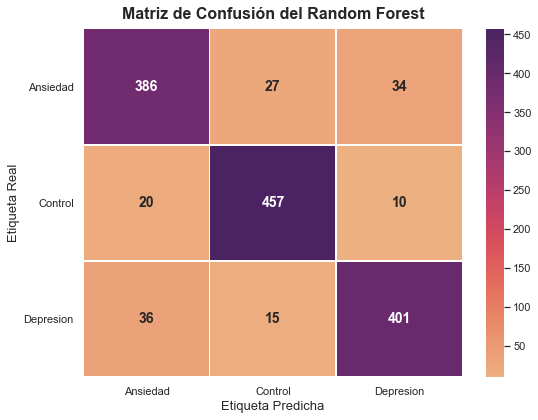

In [39]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predecir sobre test
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)

# Imprimir métricas
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)

# Estilo visual nuevo
sns.set(style="whitegrid")

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="flare",  # Nueva paleta
            xticklabels=rf.classes_,
            yticklabels=rf.classes_,
            linewidths=0.5,
            linecolor='white',
            cbar=True,
            annot_kws={"size": 14, "weight": "bold"})

# Estética textual
plt.title("Matriz de Confusión del Random Forest", fontsize=16, fontweight='semibold', pad=10)
plt.xlabel("Etiqueta Predicha", fontsize=13)
plt.ylabel("Etiqueta Real", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

plt.tight_layout()
plt.show()


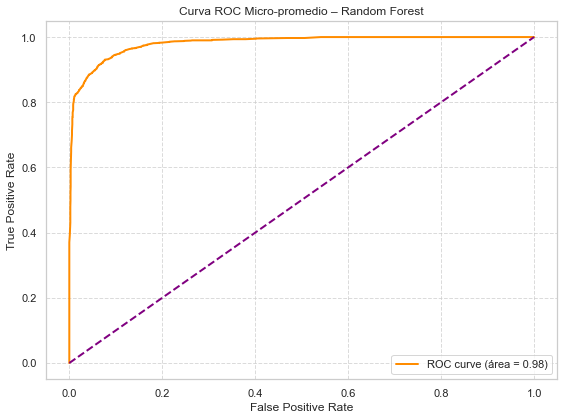

In [41]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Binarizar etiquetas reales
classes = rf.classes_
y_test_bin = label_binarize(y_test, classes=classes)

# Calcular ROC micro
fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_proba.ravel())
roc_auc = auc(fpr, tpr)

# Gráfico
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (área = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='purple', lw=2, linestyle='--')
plt.title('Curva ROC Micro-promedio – Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


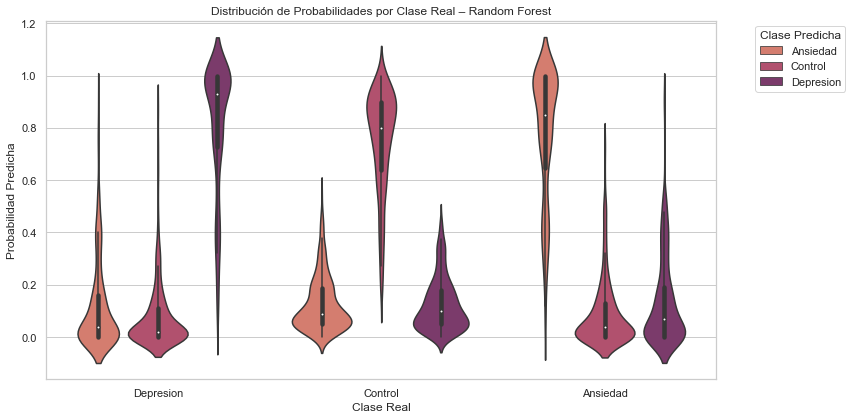

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear DataFrame con probabilidades
df_violin = pd.DataFrame(y_proba, columns=rf.classes_)
df_violin['Real'] = y_test.values

# Reestructurar para el gráfico
df_violin_melted = df_violin.melt(id_vars='Real', var_name='Clase Predicha', value_name='Probabilidad')

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=df_violin_melted, x='Real', y='Probabilidad', hue='Clase Predicha', palette='flare', dodge=True)
plt.title("Distribución de Probabilidades por Clase Real – Random Forest")
plt.xlabel("Clase Real")
plt.ylabel("Probabilidad Predicha")
plt.legend(title="Clase Predicha", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


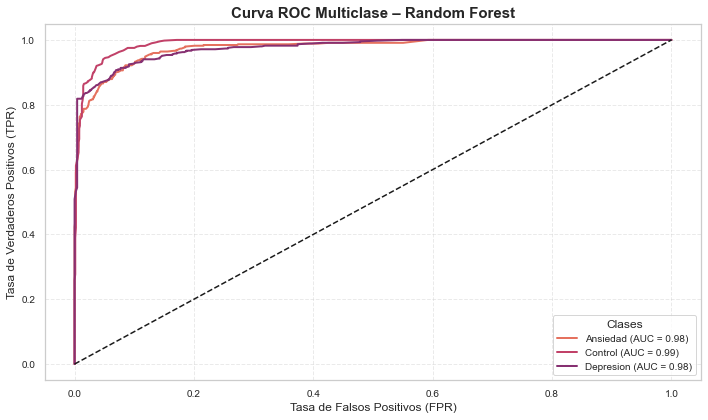

In [45]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Binarizar etiquetas
y_bin = label_binarize(y_test, classes=rf.classes_)
n_classes = y_bin.shape[1]

# Calcular curvas ROC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Colores tipo Flare (5-8 tonos)
flare_colors = sns.color_palette("flare", n_classes)

# Crear gráfico
plt.figure(figsize=(10, 6))
for i, color in zip(range(n_classes), flare_colors):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'{rf.classes_[i]} (AUC = {roc_auc[i]:.2f})', color=color)

# Línea base
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)

# Estética
plt.title('Curva ROC Multiclase – Random Forest', fontsize=15, fontweight='semibold')
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(title="Clases", loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()


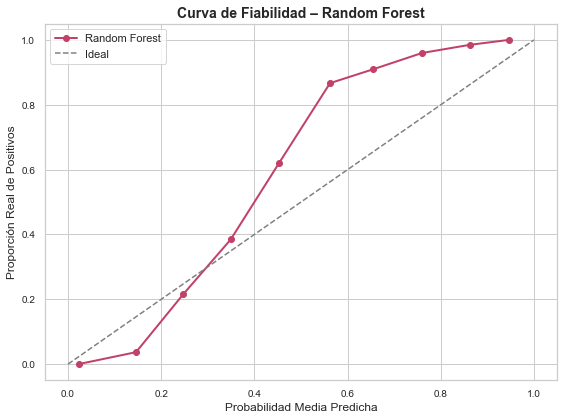

In [48]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Asegurarse de tener las probabilidades de la clase positiva (ejemplo binario)
# Si multicategoría, escoge una clase concreta para evaluar calibración (por ejemplo, clase 1)
clase_objetivo = rf.classes_[1]  # Cambia si es otra clase
idx_clase = list(rf.classes_).index(clase_objetivo)
y_proba_clase = rf.predict_proba(X_test)[:, idx_clase]

# Calcular curva de calibración
prob_true, prob_pred = calibration_curve((y_test == clase_objetivo), y_proba_clase, n_bins=10)

# Gráfico
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label='Random Forest', color=sns.color_palette("flare", 1)[0], linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Ideal')
plt.title("Curva de Fiabilidad – Random Forest", fontsize=14, fontweight='semibold')
plt.xlabel("Probabilidad Media Predicha", fontsize=12)
plt.ylabel("Proporción Real de Positivos", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.tight_layout()
plt.show()



__________________________________

## Variable relevance

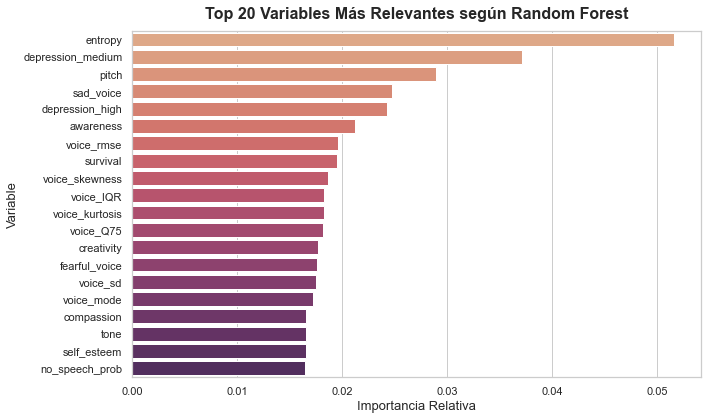

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# IMPORTANCIA DE VARIABLES EN RANDOM FOREST
# ===============================

# 1. Obtener importancias del modelo entrenado
importancias = rf.feature_importances_

# 2. Crear DataFrame con nombres de variables y su importancia relativa
importancia_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Importancia': importancias
})

# 3. Ordenar de mayor a menor importancia
importancia_df = importancia_df.sort_values(by='Importancia', ascending=False)

# 4. Visualizar las 20 variables más importantes
top_n = 20
top_features = importancia_df.head(top_n)

# ===============================
# VISUALIZACIÓN ESTILIZADA
# ===============================

# Estilo general
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features,
            x='Importancia',
            y='Variable',
            palette='flare')

# Estética textual
plt.title(f"Top {top_n} Variables Más Relevantes según Random Forest",
          fontsize=16, fontweight='semibold', pad=12)
plt.xlabel("Importancia Relativa", fontsize=13)
plt.ylabel("Variable", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()


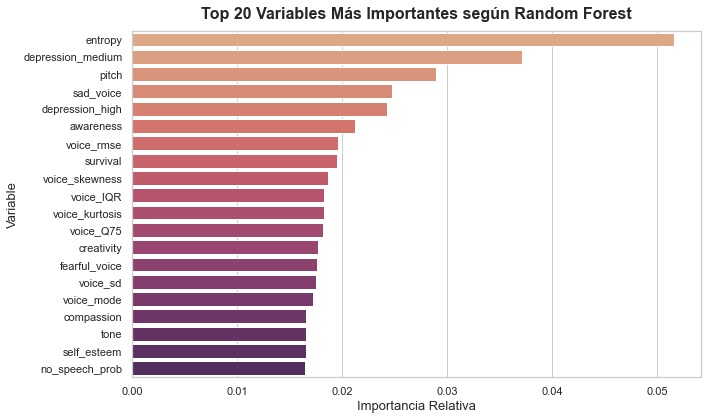

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# VISUALIZACIÓN: TOP 20 VARIABLES MÁS IMPORTANTES
# ===============================

# Estilo visual
sns.set(style="whitegrid")

# Crear figura
plt.figure(figsize=(10, 6))

# Gráfico de barras horizontales con paleta flare
sns.barplot(
    data=importancia_df.head(20),
    x='Importancia',
    y='Variable',
    palette='flare'
)

# Estética textual
plt.title("Top 20 Variables Más Importantes según Random Forest",
          fontsize=16, fontweight='semibold', pad=12)
plt.xlabel("Importancia Relativa", fontsize=13)
plt.ylabel("Variable", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()



___

----

#### USING THIS TOP 20 VARIABLES

=== Classification Report (solo top 15 variables) ===
              precision    recall  f1-score   support

    Ansiedad       0.86      0.86      0.86       447
     Control       0.92      0.92      0.92       487
   Depresion       0.88      0.87      0.87       452

    accuracy                           0.89      1386
   macro avg       0.89      0.89      0.89      1386
weighted avg       0.89      0.89      0.89      1386



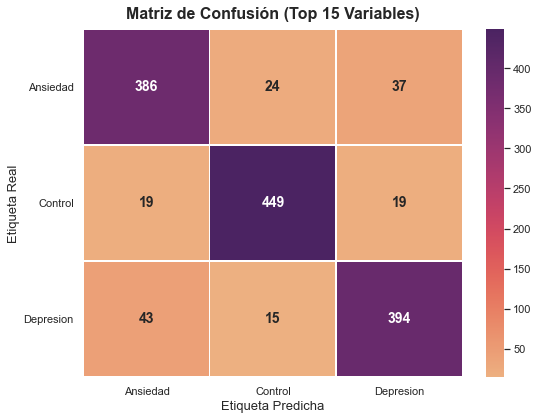

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# RANDOM FOREST USANDO SOLO LAS 20 VARIABLES MÁS RELEVANTES
# ===============================

# 1. Seleccionar nombres de las top 20 variables según importancia
top_features = importancia_df.head(20)['Variable'].tolist()

# 2. Reducir el conjunto de datos a esas columnas
X_top = X[top_features]

# 3. Rehacer la partición train/test con esas variables
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(
    X_top, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Entrenar un nuevo modelo Random Forest
rf_top = RandomForestClassifier(n_estimators=100, random_state=42)
rf_top.fit(X_train_top, y_train_top)

# 5. Realizar predicciones sobre el conjunto de test
y_pred_top = rf_top.predict(X_test_top)

# ===============================
# EVALUACIÓN CON MATRIZ DE CONFUSIÓN
# ===============================

print("=== Classification Report (solo top 15 variables) ===")
print(classification_report(y_test_top, y_pred_top))

# Crear matriz de confusión
cm_top = confusion_matrix(y_test_top, y_pred_top, labels=rf_top.classes_)

# Estilo visual
sns.set(style="whitegrid")

# Crear gráfico
plt.figure(figsize=(8, 6))
sns.heatmap(cm_top,
            annot=True,
            fmt="d",
            cmap="flare",
            xticklabels=rf_top.classes_,
            yticklabels=rf_top.classes_,
            linewidths=0.5,
            linecolor='white',
            cbar=True,
            annot_kws={"size": 14, "weight": "bold"})

# Estética textual
plt.title("Matriz de Confusión (Top 15 Variables)", fontsize=16, fontweight='semibold', pad=10)
plt.xlabel("Etiqueta Predicha", fontsize=13)
plt.ylabel("Etiqueta Real", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

plt.tight_layout()
plt.show()


## Study depending on different types of variables and their combinations

___

___

=== Classification Report (solo top 15 variables) ===
              precision    recall  f1-score   support

    Ansiedad       0.82      0.83      0.82       447
     Control       0.89      0.87      0.88       487
   Depresion       0.86      0.87      0.86       452

    accuracy                           0.86      1386
   macro avg       0.86      0.86      0.86      1386
weighted avg       0.86      0.86      0.86      1386



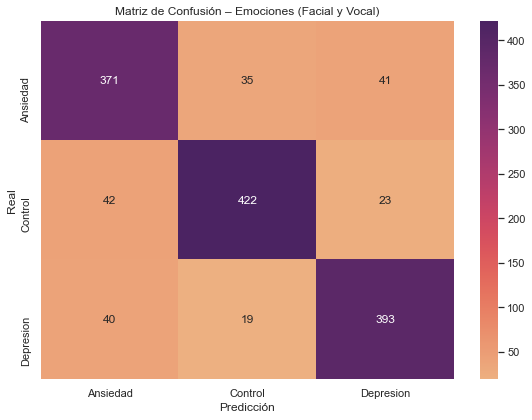

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Emociones faciales y vocales corregidas
cols = ['angry_facial', 'happy_facial', 'sad_facial',
        'angry_voice', 'happy_voice', 'sad_voice']

X = df[cols]
y = df['variable']

# Imputar valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42, stratify=y)

# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report
print("=== Classification Report (solo top 15 variables) ===")
print(classification_report(y_test, y_pred))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusión – Emociones (Facial y Vocal)")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()



=== Classification Report (solo top 15 variables) ===
              precision    recall  f1-score   support

    Ansiedad       0.87      0.85      0.86       447
     Control       0.88      0.88      0.88       487
   Depresion       0.86      0.88      0.87       452

    accuracy                           0.87      1386
   macro avg       0.87      0.87      0.87      1386
weighted avg       0.87      0.87      0.87      1386



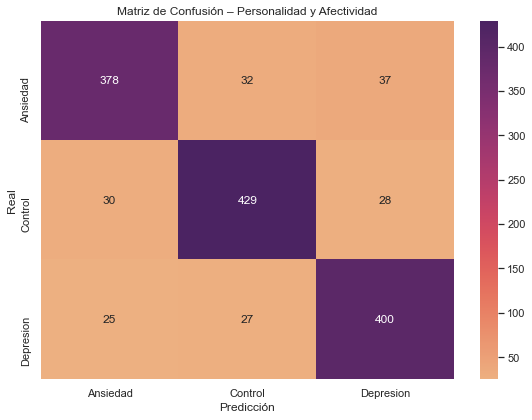

In [27]:
#Pack Personalidad + Afectividad
cols = [
    'extraversion', 'neuroticism', 'agreeableness', 'conscientiousness', 'openness',
    'survival', 'creativity', 'self_esteem', 'compassion', 'communication',
    'imagination', 'awareness'
]

X = df[cols]
y = df['variable']

# Imputación
imputer = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42, stratify=y)

# Modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report
print("=== Classification Report (solo top 15 variables) ===")
print(classification_report(y_test, y_pred))

# Gráfico
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusión – Personalidad y Afectividad")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


=== Classification Report (solo top 15 variables) ===
              precision    recall  f1-score   support

    Ansiedad       0.86      0.87      0.87       447
     Control       0.90      0.92      0.91       487
   Depresion       0.89      0.87      0.88       452

    accuracy                           0.89      1386
   macro avg       0.89      0.89      0.89      1386
weighted avg       0.89      0.89      0.89      1386



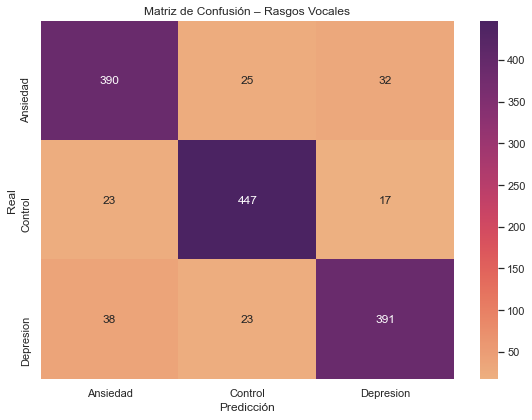

In [28]:
#Rasgos vocales
cols = [
    'voice_mean', 'voice_sd', 'voice_median', 'voice_mode', 'voice_Q25', 'voice_Q75',
    'voice_IQR', 'voice_skewness', 'voice_kurtosis', 'voice_rmse', 'pitch', 'tone',
    'no_speech_prob', 'entropy'
]

X = df[cols]
y = df['variable']

imputer = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report
print("=== Classification Report (solo top 15 variables) ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusión – Rasgos Vocales")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


=== Classification Report (solo top 15 variables) ===
              precision    recall  f1-score   support

    Ansiedad       0.87      0.85      0.86       447
     Control       0.89      0.92      0.91       487
   Depresion       0.89      0.87      0.88       452

    accuracy                           0.88      1386
   macro avg       0.88      0.88      0.88      1386
weighted avg       0.88      0.88      0.88      1386



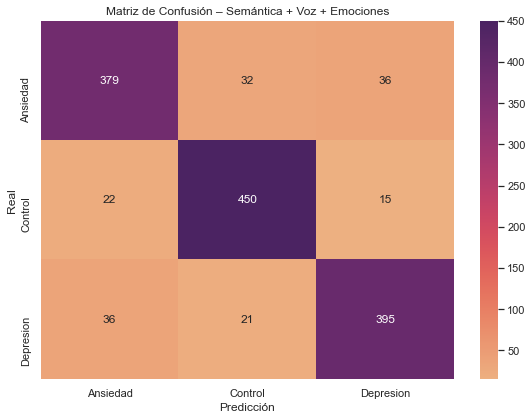

In [29]:
#Semantica voz y emociones
cols = [
    'tense_past', 'tense_present', 'tense_future',
    'sentiment_polarity', 'sentiment_subjectivity',
    'voice_mean', 'voice_sd', 'voice_skewness', 'voice_kurtosis', 'voice_rmse', 'pitch',
    'happy_voice', 'angry_voice', 'sad_voice'
]

X = df[cols]
y = df['variable']

imputer = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.2, random_state=42, stratify=y)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Classification Report
print("=== Classification Report (solo top 15 variables) ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusión – Semántica + Voz + Emociones")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()


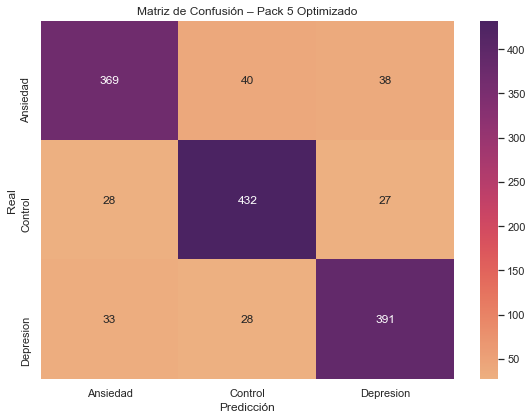

=== Classification Report ===
              precision    recall  f1-score   support

    Ansiedad       0.86      0.83      0.84       447
     Control       0.86      0.89      0.88       487
   Depresion       0.86      0.87      0.86       452

    accuracy                           0.86      1386
   macro avg       0.86      0.86      0.86      1386
weighted avg       0.86      0.86      0.86      1386



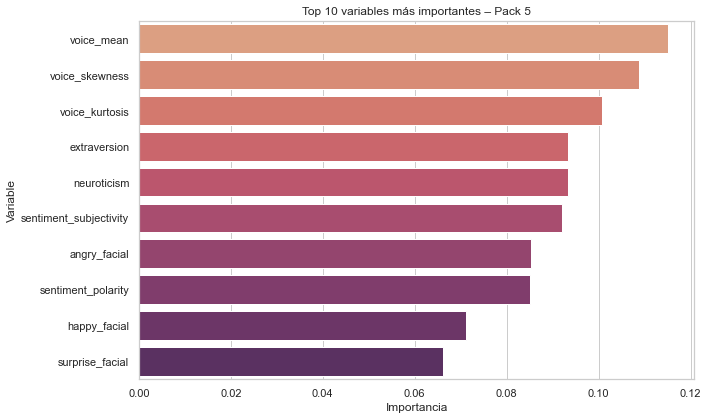

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Selección cuidadosa de variables
cols = [
    'happy_facial', 'surprise_facial', 'angry_facial',
    'extraversion', 'neuroticism',
    'voice_mean', 'voice_kurtosis', 'voice_skewness',
    'tense_present', 'tense_past',
    'sentiment_polarity', 'sentiment_subjectivity'
]

# Definir X e y
X = df[cols]
y = df['variable']

# Imputar valores numéricos faltantes
imputer = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Dividir en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y, test_size=0.2, random_state=42, stratify=y
)

# Entrenar modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# === Matriz de confusión ===
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Matriz de Confusión – Pack 5 Optimizado")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# === Reporte de clasificación ===
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

# === Importancia de variables ===
importancia = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values(by='importance', ascending=False)

# Gráfico de importancia
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia.head(10), y='feature', x='importance', palette='flare')
plt.title("Top 10 variables más importantes – Pack 5")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()


____

____

## GRADIENT BOOSTING CLASIFIER

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Filtrar solo variables numéricas
df_num = df.select_dtypes(include='number')
X = df_num.drop(columns=['variable'], errors='ignore')
y = df['variable']

# Imputación de nulos con mediana
imputer = SimpleImputer(strategy='median')
X_imp = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_imp, y, test_size=0.2, random_state=42, stratify=y
)


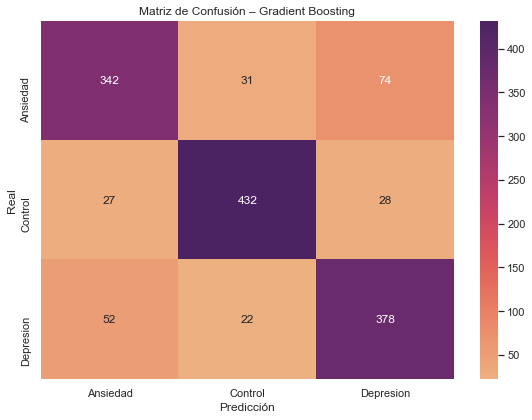

=== Classification Report ===
              precision    recall  f1-score   support

    Ansiedad       0.81      0.77      0.79       447
     Control       0.89      0.89      0.89       487
   Depresion       0.79      0.84      0.81       452

    accuracy                           0.83      1386
   macro avg       0.83      0.83      0.83      1386
weighted avg       0.83      0.83      0.83      1386



In [32]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Entrenar Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=150, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=gb.classes_)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="flare", xticklabels=gb.classes_, yticklabels=gb.classes_)
plt.title("Matriz de Confusión – Gradient Boosting")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

# Reporte de clasificación
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


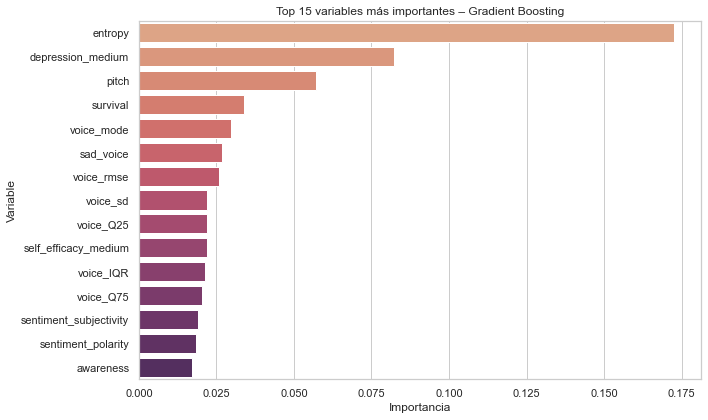

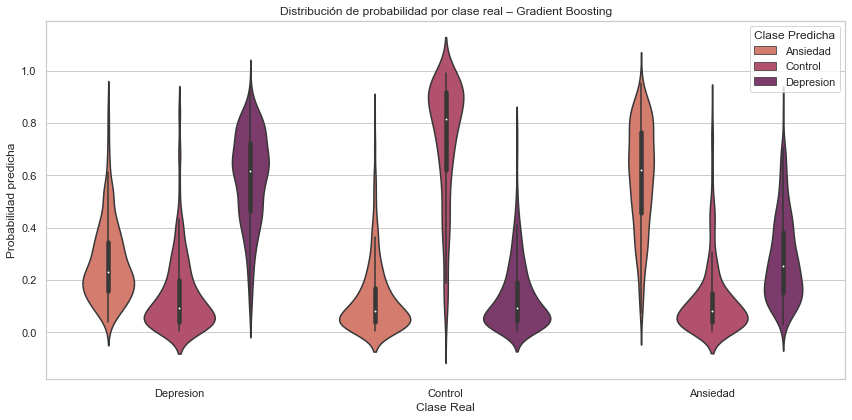

In [34]:
# Importancia de características
importancia = pd.DataFrame({
    'feature': X.columns,
    'importance': gb.feature_importances_
}).sort_values(by='importance', ascending=False)

# Top 15
plt.figure(figsize=(10, 6))
sns.barplot(data=importancia.head(15), y='feature', x='importance', palette='flare')
plt.title("Top 15 variables más importantes – Gradient Boosting")
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.tight_layout()
plt.show()

# Gráfico adicional innovador: Violin plot de predicciones por clase real (sin 'split')
probas = gb.predict_proba(X_test)
df_violin = pd.DataFrame(probas, columns=gb.classes_)
df_violin['Real'] = y_test.values

df_melted = df_violin.melt(id_vars='Real', var_name='Clase_Predicha', value_name='Probabilidad')

plt.figure(figsize=(12, 6))
sns.violinplot(data=df_melted, x='Real', y='Probabilidad', hue='Clase_Predicha', palette='flare')
plt.title("Distribución de probabilidad por clase real – Gradient Boosting")
plt.ylabel("Probabilidad predicha")
plt.xlabel("Clase Real")
plt.legend(title="Clase Predicha")
plt.tight_layout()
plt.show()


### Fin o XGBoosting segun vea